In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
import pandas as pd
import os

In [3]:
!pwd

/content


In [4]:
path = os.path.join(os.getcwd(),'gdrive','MyDrive','fastai','game_recommendation','steam-200k.csv')
df = pd.read_csv(path,names=['id','game','type','hours','0'])

In [5]:
df_n = df[df['type']=='play']

In [6]:
df_n

,id,game,type,hours,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
3,151603712,Fallout 4,play,87.0,0
5,151603712,Spore,play,14.9,0
7,151603712,Fallout New Vegas,play,12.1,0
9,151603712,Left 4 Dead 2,play,8.9,0
...,...,...,...,...,...
199991,128470551,Fallen Earth,play,2.4,0
199993,128470551,Magic Duels,play,2.2,0
199995,128470551,Titan Souls,play,1.5,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0


In [7]:
df_un = df_n.groupby(['id', 'game'],as_index=False)['hours'].sum()
df_un['log_hours'] = np.log(df_un['hours'])
df_un

,id,game,hours,log_hours
0,5250,Alien Swarm,4.9,1.589235
1,5250,Cities Skylines,144.0,4.969813
2,5250,Deus Ex Human Revolution,62.0,4.127134
3,5250,Dota 2,0.2,-1.609438
4,5250,Portal 2,13.6,2.610070
...,...,...,...,...
70472,309434439,Dota 2,0.8,-0.223144
70473,309554670,Mitos.is The Game,5.9,1.774952
70474,309626088,Age of Empires II HD Edition,6.7,1.902108
70475,309824202,Dota 2,0.7,-0.356675


In [8]:
df_un[~df_un.duplicated(subset=['game'],keep='first')]


,id,game,hours,log_hours
0,5250,Alien Swarm,4.9,1.589235
1,5250,Cities Skylines,144.0,4.969813
2,5250,Deus Ex Human Revolution,62.0,4.127134
3,5250,Dota 2,0.2,-1.609438
4,5250,Portal 2,13.6,2.610070
...,...,...,...,...
70089,301355977,Terrain Test,0.2,-1.609438
70129,302328584,Electric Highways,0.3,-1.203973
70191,302980730,Abducted,0.2,-1.609438
70248,303789064,Pink Hour,0.4,-0.916291


In [9]:
mean_hours = df_un.groupby('game').mean()['hours'].reset_index()
mean_hours.columns = ['game','mean_hours']
mean_hours

# mean_log_hours = df_un.groupby('game').mean()['log_hours'].reset_index()
# mean_log_hours.columns = ['game','mean_log_hours']
# mean_log_hours

,game,mean_hours
0,007 Legends,0.700000
1,0RBITALIS,0.400000
2,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),4.000000
3,10 Second Ninja,2.950000
4,"10,000,000",3.600000
...,...,...
3595,rymdkapsel,1.100000
3596,sZone-Online,0.977586
3597,the static speaks my name,0.250000
3598,theHunter,2.493548


In [10]:
merged = pd.merge(df_un, mean_hours, on='game')
merged['normalized_hours'] = merged['hours']/merged['mean_hours']
merged['log_hours'] = np.log(merged['hours'])/np.log(10)
merged

,id,game,hours,log_hours,mean_hours,normalized_hours
0,5250,Alien Swarm,4.9,0.690196,5.207612,0.940930
1,76767,Alien Swarm,0.8,-0.096910,5.207612,0.153621
2,298950,Alien Swarm,1.6,0.204120,5.207612,0.307243
3,975449,Alien Swarm,9.8,0.991226,5.207612,1.881860
4,1364546,Alien Swarm,0.9,-0.045757,5.207612,0.172824
...,...,...,...,...,...,...
70472,301355977,Terrain Test,0.2,-0.698970,0.200000,1.000000
70473,302328584,Electric Highways,0.3,-0.522879,0.300000,1.000000
70474,302980730,Abducted,0.2,-0.698970,0.200000,1.000000
70475,303789064,Pink Hour,0.4,-0.397940,0.400000,1.000000


In [11]:
merged.pivot(index='id',columns='game',values='normalized_hours').fillna(0)

game       007 Legends  0RBITALIS  \
id                                  
5250               0.0        0.0   
76767              0.0        0.0   
86540              0.0        0.0   
144736             0.0        0.0   
181212             0.0        0.0   
...                ...        ...   
309434439          0.0        0.0   
309554670          0.0        0.0   
309626088          0.0        0.0   
309824202          0.0        0.0   
309903146          0.0        0.0   

game       1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby)  \
id                                                                      
5250                                                              0.0   
76767                                                             0.0   
86540                                                             0.0   
144736                                                            0.0   
181212                                                            0.0   
...                                                               ...   
309434439                                                         0.0   
309554670                                                         0.0   
309626088                                                         0.0   
309824202                                                         0.0   
309903146                                                         0.0   

game       10 Second Ninja  10,000,000  100% Orange Juice  1000 Amps  \
id                                                                     
5250                   0.0         0.0                0.0        0.0   
76767                  0.0         0.0                0.0        0.0   
86540                  0.0         0.0                0.0        0.0   
144736                 0.0         0.0                0.0        0.0   
181212                 0.0         0.0                0.0        0.0   
...                    ...         ...                ...        ...   
309434439              0.0         0.0                0.0        0.0   
309554670              0.0         0.0                0.0        0.0   
309626088              0.0         0.0                0.0        0.0   
309824202              0.0         0.0                0.0        0.0   
309903146              0.0         0.0                0.0        0.0   

game       12 Labours of Hercules  12 Labours of Hercules II The Cretan Bull  \
id                                                                             
5250                          0.0                                        0.0   
76767                         0.0                                        0.0   
86540                         0.0                                        0.0   
144736                        0.0                                        0.0   
181212                        0.0                                        0.0   
...                           ...                                        ...   
309434439                     0.0                                        0.0   
309554670                     0.0                                        0.0   
309626088                     0.0                                        0.0   
309824202                     0.0                                        0.0   
309903146                     0.0                                        0.0   

game       12 Labours of Hercules III Girl Power  140  15 Days  16bit Trader  \
id                                                                             
5250                                         0.0  0.0      0.0           0.0   
76767                                        0.0  0.0      0.0           0.0   
86540                                        0.0  0.0      0.0           0.0   
144736                                       0.0  0.0      0.0           0.0   
181212                                       0.0  0.0      0.0           0.0   
...                           

In [12]:
from fastai.collab import *
from fastai.tabular.all import *

In [13]:
dls = CollabDataLoaders.from_df(merged,rating_name='log_hours')

In [14]:
# dls2 = CollabDataLoaders.from_df(merged,rating_name='normalized_hours')

In [15]:
dls.show_batch()

,id,game,log_hours
0,131444737,Worms Clan Wars,0.633468
1,82385352,Terraria,0.176091
2,55426012,Sleeping Dogs,1.380211
3,64261708,Bastion,0.361728
4,110906645,Just Cause 2 Multiplayer Mod,1.004321
5,122551425,Gothic 3,1.414973
6,48603188,Team Fortress 2,-0.522879
7,65958466,Cities XL Platinum,0.643453
8,126191291,Guns of Icarus Online,1.397940
9,26762388,Grand Theft Auto V,2.012837


In [16]:
# dls2.show_batch()

In [17]:
n_users  = len(dls.classes['id'])
n_games = len(dls.classes['game'])
n_factors = 5

user_factors = torch.randn(n_users, n_factors)
game_factors = torch.randn(n_games, n_factors)

In [18]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [19]:
class DotProductBias(Module):
    def __init__(self, n_users, n_games, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.game_factors = create_params([n_games, n_factors])
        self.game_bias = create_params([n_games])
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors[x[:,0]]
        games = self.game_factors[x[:,1]]
        res = (users*games).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.game_bias[x[:,1]]
        return res
        return sigmoid_range(res, *self.y_range)

In [20]:
x,y = dls.one_batch()
x.shape

torch.Size([64, 2])

In [21]:
model = DotProductBias(n_users, n_games, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [22]:
# model2 = DotProductBias(n_users, n_games, 50)
# learn2 = Learner(dls2, model2, loss_func=MSELossFlat())

In [23]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.717590,0.682158,00:12
1,0.559684,0.614030,00:06
2,0.372479,0.615088,00:06
3,0.237426,0.616334,00:05
4,0.156917,0.618694,00:07


In [24]:
# learn2.fit_one_cycle(5, 5e-3, wd=0.1)

In [25]:
idxs = learn.model.game_bias.argsort()[-5:]
[dls.classes['game'][i] for i in idxs]
# learn.model.game_bias.sort()[:5]

['Football Manager 2013',
 'The Elder Scrolls V Skyrim',
 'Dota 2',
 'Grand Theft Auto V',
 'Counter-Strike Global Offensive']

In [26]:
# idxs = learn2.model.game_bias.argsort()[-5:]
# [dls2.classes['game'][i] for i in idxs]

NameError: ignored

In [ ]:
dls.classes['game']

In [28]:
dls.classes['game'].o2i['Dota 2']

923

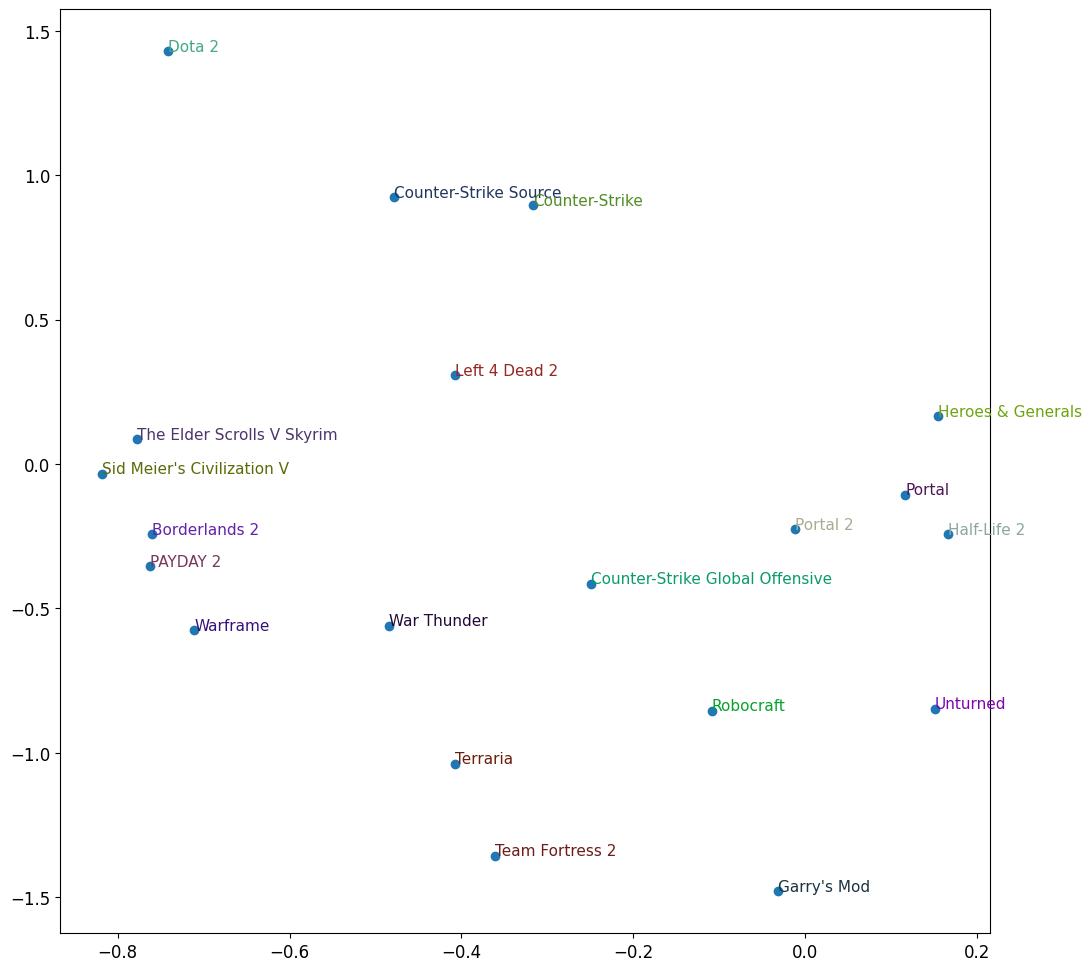

In [29]:
#hide_input
#id img_pca_movie
#caption Representation of movies based on two strongest PCA components
#alt Representation of movies based on two strongest PCA components
g = merged.groupby('game')['log_hours'].count()
top_games = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes['game'].o2i[m] for m in top_games])
movie_w = learn.model.game_factors[top_idxs].cpu().detach()
movie_pca = movie_w.pca(3)
fac0,fac1,fac2 = movie_pca.t()
idxs = list(range(20))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_games[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [86]:
toCompare = "Dota 2"
if not toCompare in learn.dls.classes['game']:
  print('Game not found in Database')
  return
tci = learn.dls.classes['game'].o2i[toCompare]
tco = learn.model.game_factors[tci][None]
g = merged.groupby('game')['log_hours'].count()
top_games = g.sort_values(ascending=False).index.values[:100]
top_idxs = tensor([learn.dls.classes['game'].o2i[m] for m in top_games])
game_factors = learn.model.game_factors[top_idxs]
distances = nn.CosineSimilarity(dim=1)(game_factors, tco)
idx = distances.argsort(descending=True)[0:6].to('cpu')
print(f'If you like {top_games[idx[0]]}, you should try:\
    \n1. {top_games[idx[1]]} - {distances[idx[1]]:.2f}\
    \n2. {top_games[idx[2]]} - {distances[idx[2]]:.2f}\
    \n3. {top_games[idx[3]]} - {distances[idx[3]]:.2f}\
    \n4. {top_games[idx[4]]} - {distances[idx[4]]:.2f}\
    \n5. {top_games[idx[5]]} - {distances[idx[5]]:.2f}')


True
If you like Dota 2, you should try:    
1. Call of Duty Modern Warfare 2 - Multiplayer - 0.42    
2. Euro Truck Simulator 2 - 0.39    
3. Saints Row The Third - 0.38    
4. Call of Duty Black Ops - Multiplayer - 0.36    
5. Tom Clancy's Ghost Recon Phantoms - EU - 0.36


tensor([0.5608, 0.4301, 0.3787, 0.3578, 0.3210], grad_fn=<IndexBackward0>)

In [59]:
learn.export('model.pkl')

In [60]:
learn.save('model.pkl')

Path('models/model.pkl.pth')

In [61]:
import gradio as gr
from fastai.vision.all import *
# import os
# Load a pre-trained image classification model
import pathlib
plt = platform.system()
if plt == 'Windows': pathlib.PosixPath = pathlib.WindowsPath
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath

root = os.path.dirname(__file__)



# def get_label(fname):
#     id = int(fname.name[-9:-4])
# #     print(id)
#     cls = int(labels[id-1])-1
# #     print(cls)
#     return name(cls)

learn = load_learner("./models/model.pkl")


# Function to make predictions from an image
# def classify_image(image):
#     # Make a prediction
#     # Decode the prediction and get the class name
#     name = learn.predict(image)
#     return name[0]

# Sample images for user to choose from

def recommend(toCompare):
  if not toCompare in learn.dls.classes['game']:
    print('Game not found in Database')
    return
  tci = learn.dls.classes['game'].o2i[toCompare]
  tco = learn.model.game_factors[tci][None]
  g = merged.groupby('game')['log_hours'].count()
  top_games = g.sort_values(ascending=False).index.values[:100]
  top_idxs = tensor([learn.dls.classes['game'].o2i[m] for m in top_games])
  game_factors = learn.model.game_factors[top_idxs]
  distances = nn.CosineSimilarity(dim=1)(game_factors, tco)
  idx = distances.argsort(descending=True)[0:6].to('cpu')
  output = f'If you like {top_games[idx[0]]}, you should try:\
      \n1. {top_games[idx[1]]} - {distances[idx[1]]:.2f}\
      \n2. {top_games[idx[2]]} - {distances[idx[2]]:.2f}\
      \n3. {top_games[idx[3]]} - {distances[idx[3]]:.2f}\
      \n4. {top_games[idx[4]]} - {distances[idx[4]]:.2f}\
      \n5. {top_games[idx[5]]} - {distances[idx[5]]:.2f}'
  print(output)
  return output


sample_images = ["./sample_images/AcuraTLType-S2008.jpg", "./sample_images/AudiR8Coupe2012.jpg","./sample_images/DodgeMagnumWagon2008.jpg"]

iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(label="Select an image", type="filepath"),
    outputs="text",
    live=False,
    title="Car image classifier",
    description="Upload a car image or select one of the examples below",
    examples=sample_images
)


iface.launch()

ModuleNotFoundError: ignored

In [66]:
learn = load_learner("./models/model.pkl")

In [88]:
merged.to_csv('data.csv', index=False)

In [92]:
list(merged['game'].unique())

['Alien Swarm',
 'Cities Skylines',
 'Deus Ex Human Revolution',
 'Dota 2',
 'Portal 2',
 'Team Fortress 2',
 'Age of Empires II HD Edition',
 'Banished',
 'Call of Duty Black Ops',
 'Call of Duty Black Ops - Multiplayer',
 'Call of Duty Modern Warfare 2',
 'Call of Duty Modern Warfare 2 - Multiplayer',
 'Call of Duty Modern Warfare 3',
 'Call of Duty Modern Warfare 3 - Multiplayer',
 'Call of Duty World at War',
 'Counter-Strike',
 'Counter-Strike Global Offensive',
 'Counter-Strike Source',
 'Half-Life',
 'Rise of Nations Extended Edition',
 'The Stanley Parable',
 'Thief Deadly Shadows',
 'Total War ATTILA',
 'Worms Armageddon',
 'Alan Wake',
 'Audiosurf',
 'Borderlands 2',
 'Far Cry 3',
 'Killer is Dead',
 'Left 4 Dead 2',
 'Max Payne 3',
 'Portal',
 'Serious Sam HD The First Encounter',
 'The Elder Scrolls V Skyrim',
 'The Walking Dead',
 "Tom Clancy's Ghost Recon Advanced Warfighter",
 'Torchlight II',
 'XCOM Enemy Unknown',
 'Half-Life 2 Lost Coast',
 'Counter-Strike Condition Z

In [ ]:
import gradio as gr
from fastai.vision.all import *
import pandas as pd
import os
# Load a pre-trained image classification model
import pathlib
plt = platform.system()
if plt == 'Windows': pathlib.PosixPath = pathlib.WindowsPath
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath

# root = os.path.dirname(__file__)
class DotProductBias(Module):
    def __init__(self, n_users, n_games, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.game_factors = create_params([n_games, n_factors])
        self.game_bias = create_params([n_games])
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors[x[:,0]]
        games = self.game_factors[x[:,1]]
        res = (users*games).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.game_bias[x[:,1]]
        return res
        return sigmoid_range(res, *self.y_range)


# def get_label(fname):
#     id = int(fname.name[-9:-4])
# #     print(id)
#     cls = int(labels[id-1])-1
# #     print(cls)
#     return name(cls)

learn = load_learner(os.path.join(os.getcwd(),'models','model.pkl'))

merged = pd.read_csv('data.csv')
g = merged.groupby('game')['log_hours'].count()
top_games = g.sort_values(ascending=False).index.values[:100]
top_idxs = tensor([learn.dls.classes['game'].o2i[m] for m in top_games])


# Function to make predictions from an image
# def classify_image(image):
#     # Make a prediction
#     # Decode the prediction and get the class name
#     name = learn.predict(image)
#     return name[0]

# Sample images for user to choose from

def recommend(game):
  if not game in learn.dls.classes['game']:
    output = 'Game not found in Database'
    print(output)
    return output
  tci = learn.dls.classes['game'].o2i[game]
  tco = learn.model.game_factors[tci][None]
  g = merged.groupby('game')['log_hours'].count()
  top_games = g.sort_values(ascending=False).index.values[:100]
  top_idxs = tensor([learn.dls.classes['game'].o2i[m] for m in top_games])
  game_factors = learn.model.game_factors[top_idxs]
  distances = nn.CosineSimilarity(dim=1)(game_factors, tco)
  idx = distances.argsort(descending=True)[0:6].to('cpu')
  # print(learn.dls.classes['game'])
  output = f'If you like {game}, you should try:\
      \n1. {top_games[idx[1]]} - {distances[idx[1]]:.2f}\
      \n2. {top_games[idx[2]]} - {distances[idx[2]]:.2f}\
      \n3. {top_games[idx[3]]} - {distances[idx[3]]:.2f}\
      \n4. {top_games[idx[4]]} - {distances[idx[4]]:.2f}\
      \n5. {top_games[idx[5]]} - {distances[idx[5]]:.2f}'
  print(output)
  return output


# sample_images = ["./sample_images/AcuraTLType-S2008.jpg", "./sample_images/AudiR8Coupe2012.jpg","./sample_images/DodgeMagnumWagon2008.jpg"]

iface = gr.Interface(
    fn=recommend,
    inputs=gr.Dropdown(list(sorted(top_games)), label="Name of the game you like", info="Will add more games later!"),
    outputs="text",
    live=False,
    title="Game Recommendation System",
    description="Select a game fro the list below",
    examples=['Call of Duty Black Ops', 'Team Fortress 2', 'Dota 2', 'Portal']
)


iface.launch()